In [137]:
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np
from sklearn.feature_selection import r_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

df = pd.read_csv('./data/workingData')

MSE = 437.5619487115381
MAE = 18.001807692307683
R-squared = 0.8168851816979027
k = 10:  1183.9145835924999
LOOCV:  1235.096082867347


([<matplotlib.axis.XTick at 0x7799a8e2d960>,
 [Text(0, 0, '10-fold'), Text(1, 0, 'LOOCV')])

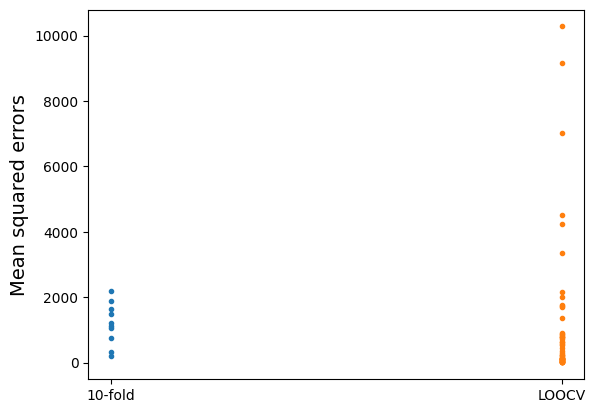

In [138]:
# Initialize model
from sklearn import metrics


seed = 123
test_p = 0.2

X = df[['Vegetables']].values.reshape(-1, 1)
y = df[['co2_including_luc']].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(

    X, y, test_size=test_p, random_state=seed
)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

knnModel = KNeighborsRegressor(n_neighbors=2)
knnModel.fit(X_train, np.ravel(y_train))
y_pred = knnModel.predict(X_test)



print('MSE =', mean_squared_error(y_test, y_pred))
print('MAE =', mean_absolute_error(y_test, y_pred))
print('R-squared =', r2_score(y_test, y_pred))

ten_fold_scores = -cross_val_score(
    knnModel, X_train, y_train, scoring='neg_mean_squared_error', cv=10
)

LOOCV_scores = -cross_val_score(knnModel, X_train, y_train, scoring='neg_mean_squared_error', cv=49)
print('k = 10: ', np.mean(ten_fold_scores))
print('LOOCV: ', np.mean(LOOCV_scores))

plt.plot(np.zeros_like(ten_fold_scores), ten_fold_scores, '.')
plt.plot(np.zeros_like(LOOCV_scores) + 1, LOOCV_scores, '.')
plt.ylabel('Mean squared errors', fontsize=14)
plt.xticks([0, 1], ['10-fold', 'LOOCV'])

Text(0, 0.5, 'Mean squared error')

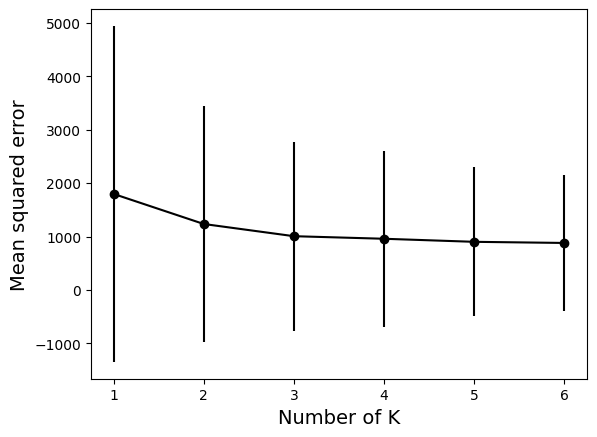

In [139]:

cvMeans = []
cvStdDev = []


seed = 123
test_p = 0.2

X = df[['Vegetables']].values.reshape(-1, 1)
y = df[['co2_including_luc']].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(

    X, y, test_size=test_p, random_state=seed
)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

for i in range(1, 7):
    knnModel = KNeighborsRegressor(n_neighbors=i)
    knnModel.fit(X_train, np.ravel(y_train))
    y_pred = knnModel.predict(X_test)

    knnScore = -cross_val_score(
        knnModel, X_train, y_train, scoring='neg_mean_squared_error', cv=49
    )

    cvMeans.append(np.mean(knnScore))
    cvStdDev.append(np.std(knnScore))


plt.errorbar(x=range(1, 7), y=cvMeans, yerr=cvStdDev, marker='o', color='black')
plt.xlabel('Number of K', fontsize=14)
plt.ylabel('Mean squared error', fontsize=14)
